In [ ]:
# pip install numpy
# pip install matplotlib
# pip install pandas
# pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =pd.read_csv('Expanded_data_with_more_features.csv')
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [8]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,22076.000000,20949.000000,22075.000000,22075.000000,22075.000000
mean,494.885622,2.137811,66.602673,69.419298,68.471438
std,288.026078,1.473545,15.385894,14.758806,15.457044
min,0.000000,0.000000,0.000000,11.000000,6.000000
25%,246.000000,1.000000,56.000000,59.000000,58.000000
50%,490.000000,2.000000,67.000000,70.000000,69.000000
75%,744.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


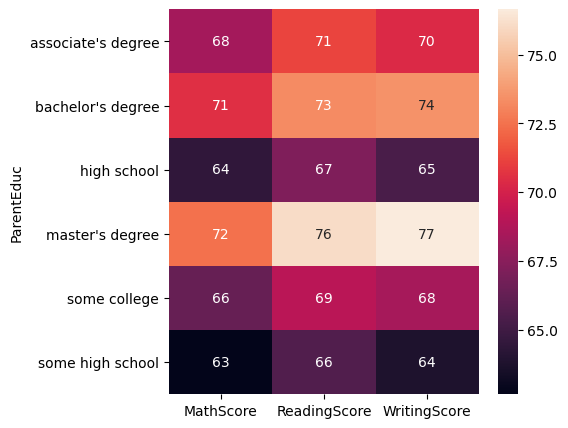

In [7]:
plt.figure(figsize=(5, 5))
sns.heatmap(gb, annot=True)
plt.show()

In [9]:
df.info

<bound method DataFrame.info of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
22071         508    male     group C        some college  free/reduced   
22072         509  female     group D         high school  free/reduced   
22073         510    male     group C    some high school      standard   
22074         511  female     group E    some high school      standard   
22075         512    male     group C        some college  free/reduced   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  Nr

In [10]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1299
ParentEduc             1339
LunchType                 0
TestPrep               1319
ParentMaritalStatus     861
PracticeSport           461
IsFirstChild            696
NrSiblings             1127
TransportMeans         2265
WklyStudyHours          684
MathScore                 1
ReadingScore              1
WritingScore              1
dtype: int64

# Drop Unnamed Column

In [11]:
df= df.drop("Unnamed: 0", axis = 1)
print(df.head())


   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5       71.0          71.0          74.0  


# Gender Distribution

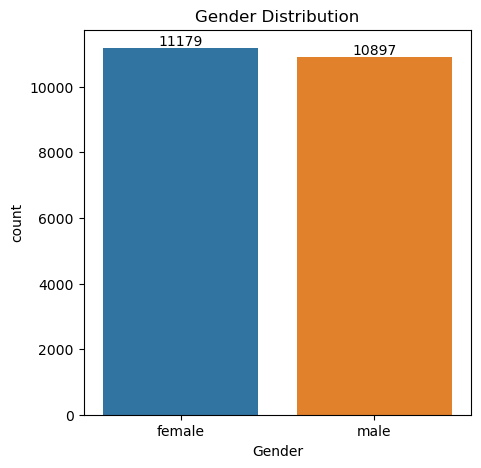

In [12]:
plt.figure(figsize= (5,5))
ax= sns.countplot(data= df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

From the Above Chart We have Conclude that the number of Females are than the number of Males 

In [13]:
gb = df.groupby("ParentEduc").agg({"MathScore": "mean", "ReadingScore": 'mean', "WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.381731     71.189482     70.331656
bachelor's degree   70.560064     73.276014     73.505022
high school         64.434051     67.151448     65.341005
master's degree     72.454545     76.061953     76.651178
some college        66.349019     69.088204     68.428571
some high school    62.650699     65.609032     63.789920


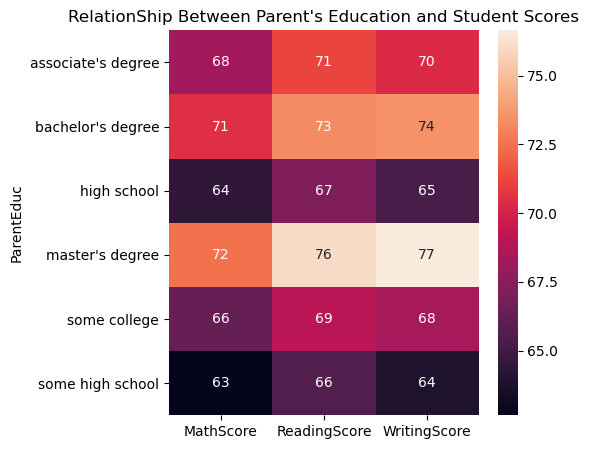

In [14]:
plt.figure(figsize=(5, 5))
sns.heatmap(gb, annot=True)
plt.title("RelationShip Between Parent's Education and Student Scores")
plt.show()

**From the Above Chart We have Concluded that Parent's Edu have a good impact on the Student grades**

In [15]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore": "mean", "ReadingScore": 'mean', "WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.485385     69.502530     68.689432
married              66.759424     69.520741     68.565185
single               66.193771     69.089493     68.069781
widowed              68.113164     69.967667     68.953811


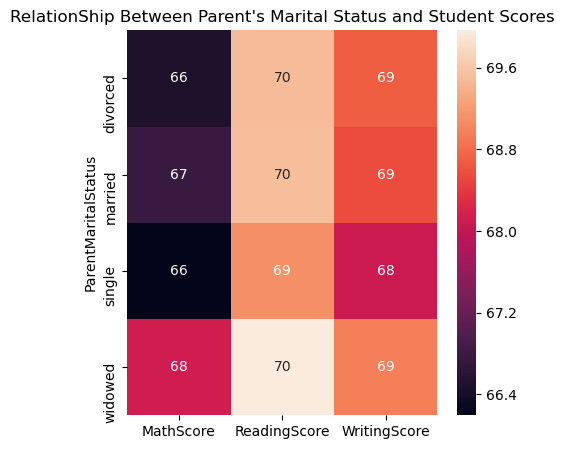

In [16]:
plt.figure(figsize=(5, 5))
sns.heatmap(gb1, annot = True)
plt.title("RelationShip Between Parent's Marital Status and Student Scores")
plt.show()

**From the Above Chart We Have Conclude that Parent's Marital Status has no or negiligle impact on the student scores**

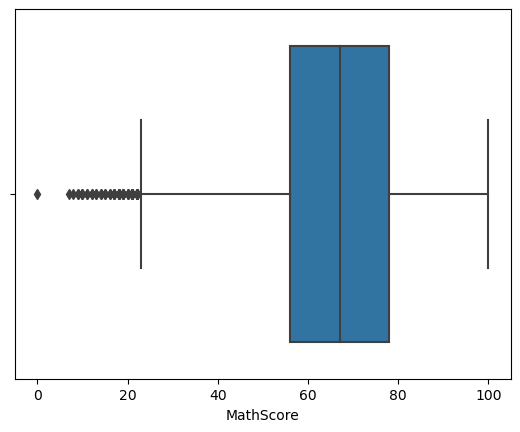

In [17]:
sns.boxplot(data= df, x="MathScore")
plt.show()

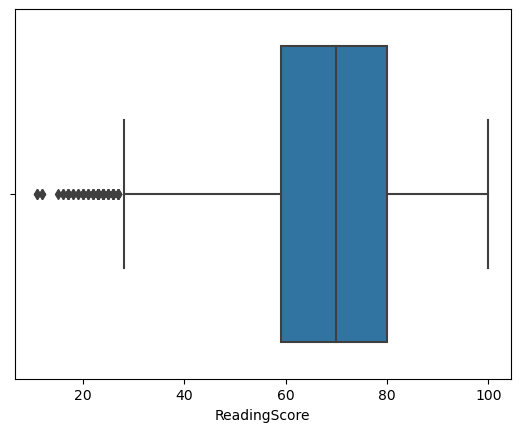

In [18]:
sns.boxplot(data= df, x="ReadingScore")
plt.show()

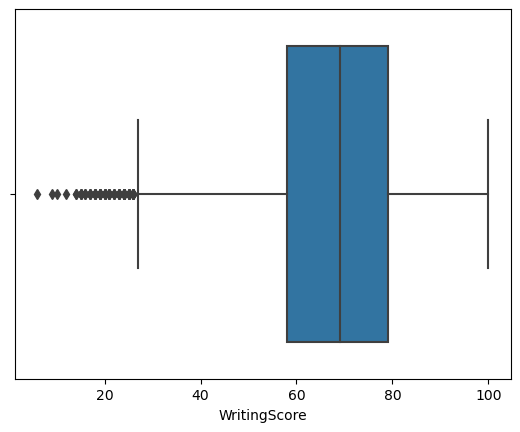

In [19]:
sns.boxplot(data= df, x="WritingScore")
plt.show()

In [20]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic Group

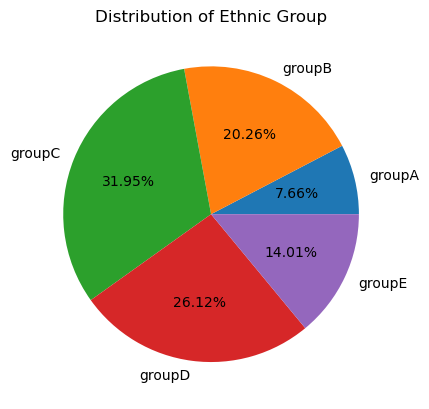

In [21]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

l = ["groupA","groupB", "groupC", "groupD", "groupE"]
mlist= [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

plt.pie(mlist, labels=l, autopct= "%1.2f%%")
plt.title("Distribution of Ethnic Group")
plt.show()

[Text(0, 0, '6639'),
 Text(0, 0, '4210'),
 Text(0, 0, '1591'),
 Text(0, 0, '5427'),
 Text(0, 0, '2910')]

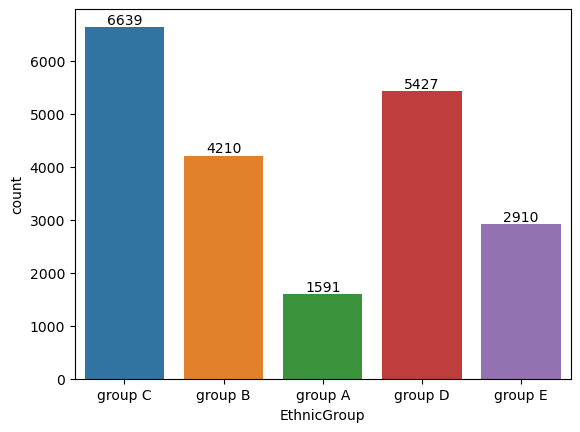

In [22]:
ax = sns.countplot(data=df, x="EthnicGroup")
ax.bar_label(ax.containers[0])